## All Required Libraries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

## Insurance Data

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,region,expenses
0,NaN,female,27.9,0.0,yes,southwest,16884.92
1,18.0,male,33.8,1.0,no,southeast,1725.55
2,28.0,male,33.0,3.0,no,southeast,4449.46
3,33.0,male,22.7,0.0,no,northwest,21984.47
4,32.0,male,28.9,0.0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50.0,male,31.0,3.0,no,northwest,10600.55
1334,18.0,female,31.9,0.0,no,northeast,2205.98
1335,18.0,female,36.9,0.0,no,southeast,1629.83
1336,21.0,female,25.8,0.0,no,southwest,2007.95


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,NaN,female,27.9,0.0,yes,southwest,16884.92
1,18.0,male,33.8,1.0,no,southeast,1725.55
2,28.0,male,33.0,3.0,no,southeast,4449.46
3,33.0,male,22.7,0.0,no,northwest,21984.47
4,32.0,male,28.9,0.0,no,northwest,3866.86


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50.0,male,31.0,3.0,no,northwest,10600.55
1334,18.0,female,31.9,0.0,no,northeast,2205.98
1335,18.0,female,36.9,0.0,no,southeast,1629.83
1336,21.0,female,25.8,0.0,no,southwest,2007.95
1337,61.0,female,29.1,0.0,yes,northwest,29141.36


In [ ]:
df.sample(5)

,age,sex,bmi,children,smoker,region,expenses
692,20.0,male,32.4,1.0,no,northwest,2362.23
413,25.0,male,23.9,5.0,no,southwest,5080.10
1017,26.0,female,34.2,2.0,no,southwest,3987.93
1244,18.0,male,33.3,0.0,no,southeast,1135.94
294,25.0,male,26.8,3.0,no,southwest,3906.13


## Basic Information About The Data (Data Preprocessing)

In [ ]:
df.shape

(1338, 7)

In [ ]:
# initial memory required by data is 73.3KB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1333 non-null   float64
 1   sex       1333 non-null   object 
 2   bmi       1334 non-null   float64
 3   children  1333 non-null   float64
 4   smoker    1333 non-null   object 
 5   region    1334 non-null   object 
 6   expenses  1334 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [ ]:
# complete row is empty
df.isna().all(axis = 1).sum()

np.int64(2)

In [ ]:
df.isnull().sum()

,0
age,5
sex,5
bmi,4
children,5
smoker,5
region,4
expenses,4


In [ ]:
df.duplicated().sum()

np.int64(2)

In [ ]:
# rows having atleast one missing values
df[df.isna().any(axis = 1)]

,age,sex,bmi,children,smoker,region,expenses
0,NaN,female,27.9,0.0,yes,southwest,16884.92
6,46.0,NaN,33.4,1.0,no,southeast,8240.59
19,30.0,male,35.3,NaN,yes,southwest,36837.47
92,59.0,male,29.8,3.0,yes,northeast,NaN
737,26.0,male,23.7,NaN,no,southwest,3484.33
775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,35.0,female,23.5,2.0,NaN,NaN,NaN
881,23.0,male,27.4,1.0,NaN,northwest,2789.06
893,47.0,NaN,38.9,2.0,yes,southeast,44202.65
914,33.0,male,24.6,NaN,no,northwest,5257.51


In [ ]:
# these rows are duplicated of each others
df[df.duplicated(keep = False)]

,age,sex,bmi,children,smoker,region,expenses
195,19.0,male,30.6,0.0,no,northwest,1639.56
581,19.0,male,30.6,0.0,no,northwest,1639.56
775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
917,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,age,bmi,children,expenses
count,1333.000000,1334.000000,1333.000000,1.334000e+03
mean,39.564141,30.719565,1.095274,4.513014e+04
std,20.124869,6.635871,1.208982,1.159071e+06
min,0.000000,-3.000000,0.000000,1.121870e+03
25%,27.000000,26.300000,0.000000,4.740288e+03
50%,39.000000,30.400000,1.000000,9.382030e+03
75%,51.000000,34.775000,2.000000,1.663992e+04
max,564.000000,120.000000,5.000000,4.234440e+07


sex
male      673
female    660
Name: count, dtype: int64


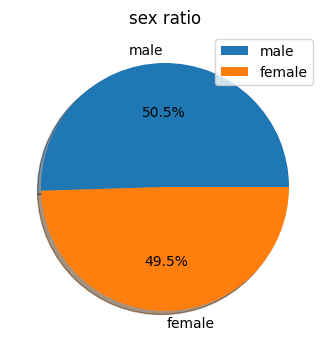

In [ ]:
gender_category = df['sex'].value_counts()
print(gender_category)

plt.figure(figsize = (4,6))
plt.pie(gender_category, autopct = '%0.1f%%', shadow = True, labels = ['male', 'female'])
plt.title("sex ratio")
plt.legend()
plt.show()

smoker
no     1060
yes     273
Name: count, dtype: int64


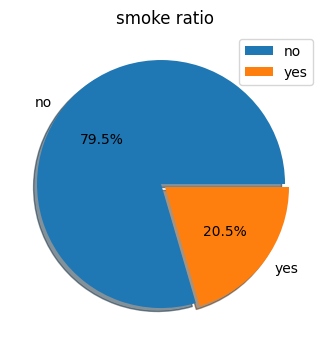

In [ ]:
smoker_category = df['smoker'].value_counts()
print(smoker_category)

plt.figure(figsize = (4,6))
plt.pie(smoker_category, autopct = '%0.1f%%', shadow = True, labels = ['no', 'yes'], explode = [0.04, 0])
plt.title("smoke ratio")
plt.legend()
plt.show()

region
southeast    363
northwest    325
southwest    324
northeast    322
Name: count, dtype: int64


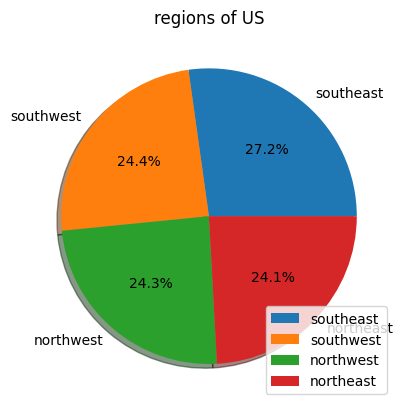

In [ ]:
regions = df['region'].value_counts()
print(regions)

plt.pie(regions, autopct = '%0.1f%%', shadow = True, labels = ['southeast', 'southwest', 'northwest', 'northeast'])
plt.title("regions of US")
plt.legend()
plt.show()

## Code To Find Outliers

In [ ]:
Q1 = df['expenses'].quantile(0.25)
Q3 = df['expenses'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower)
print("Upper Bound:", upper)
outliers = df[(df["expenses"] < lower) | (df["expenses"] > upper)]
outliers.shape

Q1: 4740.2875
Q3: 16639.915
IQR: 11899.6275
Lower Bound: -13109.15375
Upper Bound: 34489.35625


(139, 7)

In [ ]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower)
print("Upper Bound:", upper)
outliers = df[(df["age"] < lower) | (df["age"] > upper)]
outliers.shape

Q1: 27.0
Q3: 51.0
IQR: 24.0
Lower Bound: -9.0
Upper Bound: 87.0


(1, 7)

In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower)
print("Upper Bound:", upper)
outliers = df[(df["bmi"] < lower) | (df["bmi"] > upper)]
outliers.shape

Q1: 26.3
Q3: 34.775
IQR: 8.474999999999998
Lower Bound: 13.587500000000004
Upper Bound: 47.4875


(10, 7)

In [ ]:
Q1 = df['children'].quantile(0.25)
Q3 = df['children'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower)
print("Upper Bound:", upper)
outliers = df[(df["children"] < lower) | (df["children"] > upper)]
outliers.shape

Q1: 0.0
Q3: 2.0
IQR: 2.0
Lower Bound: -3.0
Upper Bound: 5.0


(0, 7)

## Pearson Coefficient To Find Correlation

In [ ]:
num_cols = ['age', 'bmi', 'children', 'expenses']

In [ ]:

def pearson_manual(x, y):
    x_mean = x.mean()
    y_mean = y.mean()

    numerator = ((x - x_mean) * (y - y_mean)).sum()
    denominator = np.sqrt(((x - x_mean)**2).sum() * ((y - y_mean)**2).sum())

    return numerator / denominator

In [ ]:
corr_matrix_manual = pd.DataFrame(
    index=num_cols,
    columns=num_cols,
    dtype=float
)

In [ ]:
for col1 in num_cols:
    for col2 in num_cols:
        corr_matrix_manual.loc[col1, col2] = pearson_manual(
            df[col1], df[col2]
        )

In [ ]:
corr_matrix_manual

,age,bmi,children,expenses
age,1.000000,0.056651,0.029251,0.017871
bmi,0.056651,1.000000,0.015126,0.032216
children,0.029251,0.015126,1.000000,-0.024162
expenses,0.017871,0.032216,-0.024162,1.000000


In [ ]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

               age       bmi  children  expenses
age       1.000000  0.056737  0.029283  0.017877
bmi       0.056737  1.000000  0.015148  0.032230
children  0.029283  0.015148  1.000000 -0.024190
expenses  0.017877  0.032230 -0.024190  1.000000


children
0.0    572
1.0    324
2.0    238
3.0    155
4.0     25
5.0     19
Name: count, dtype: int64


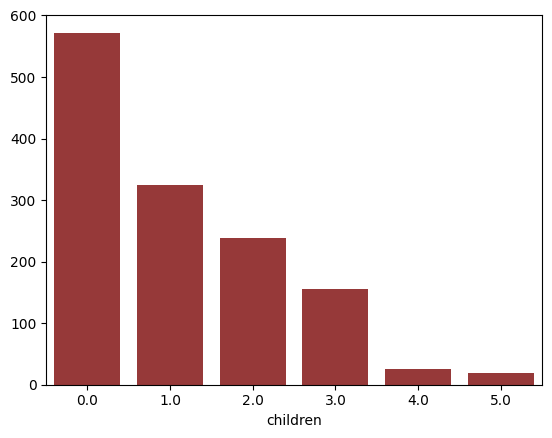

In [ ]:
no_of_childrens = df['children'].value_counts()
print(no_of_childrens)


sns.barplot(x = no_of_childrens.index, y = no_of_childrens.values, color = 'brown')
plt.show()

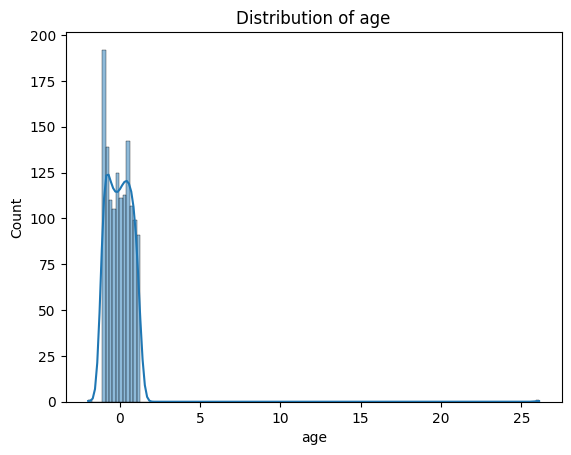

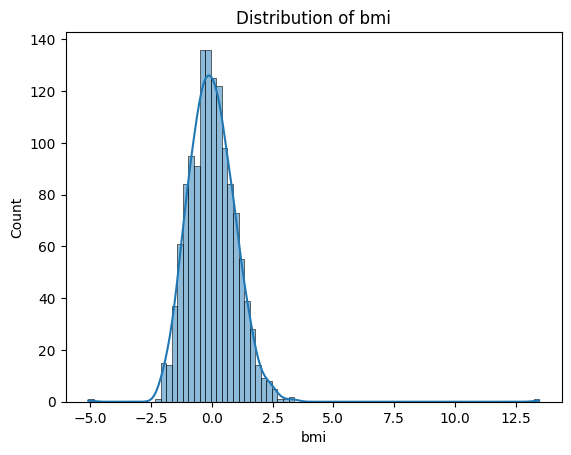

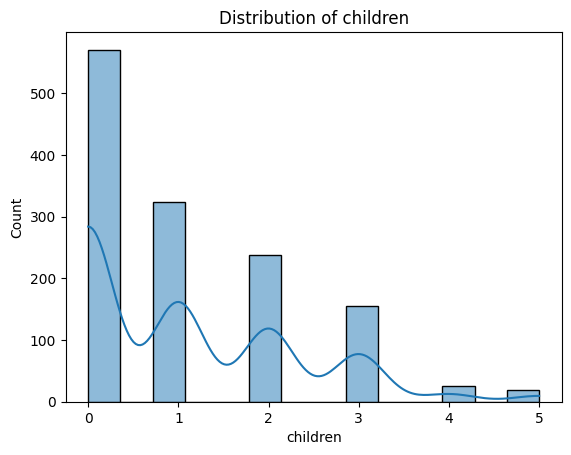

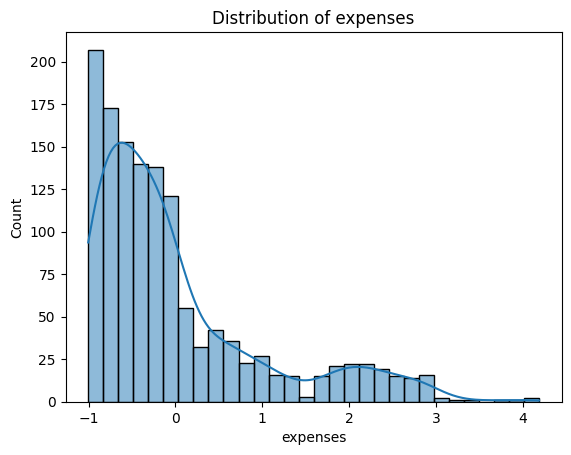

In [ ]:
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
# bmi is normally distributed
print("skewness of age :", df['age'].skew())
print("skewness of bmi :", df['bmi'].skew())
print("skewness of expenses :", df['expenses'].skew())

skewness of age : 13.293312614030175
skewness of bmi : 1.9342260267465141
skewness of expenses : 36.51653159542552


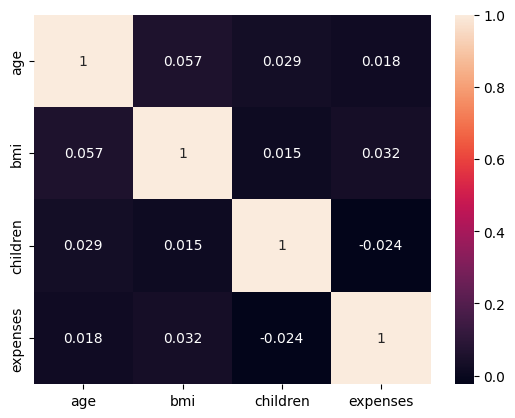

In [ ]:
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

## Data Cleaning

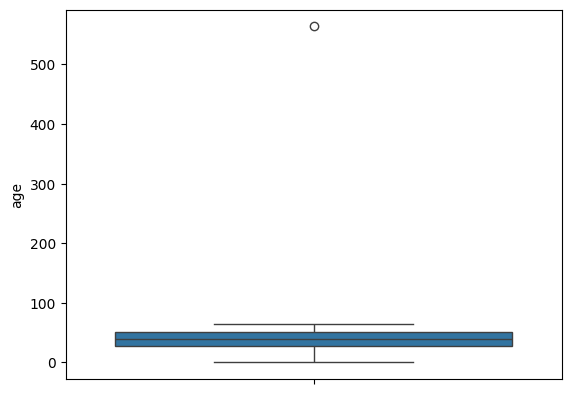

In [ ]:

sns.boxplot(df['age'])

plt.show()

In [ ]:
print(df['age'].nlargest(3))
print(df['age'].nsmallest(3))

980    564.0
62      64.0
94      64.0
Name: age, dtype: float64
916     0.0
1      18.0
22     18.0
Name: age, dtype: float64


In [ ]:
df.loc[df["age"] == df['age'].max(), 'age'] = df.drop(index = df.loc[df["age"] == df['age'].max()].index)['expenses'].mode()
df.loc[df["age"] == df['age'].min(), 'age'] = df.drop(index = df.loc[df["age"] == df['age'].min()].index)['expenses'].mode()

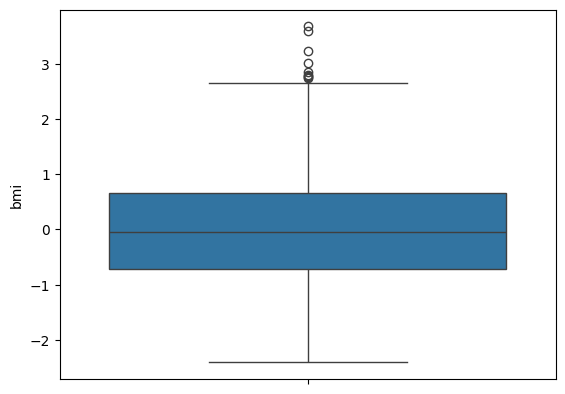

In [ ]:
sns.boxplot(df['bmi'])
plt.show()

In [ ]:
print(df["bmi"].nlargest(3))
print(df["bmi"].nsmallest(3))

361     120.0
1317     53.1
1047     52.6
Name: bmi, dtype: float64
1267    -3.0
172     16.0
428     16.8
Name: bmi, dtype: float64


In [ ]:
df.loc[df["bmi"] == df['bmi'].max(), 'bmi'] = df.drop(index = df.loc[df["bmi"] == df["bmi"].max()].index)['bmi'].mean()
df.loc[df["bmi"] == df['bmi'].min(), 'bmi'] = df.drop(index = df.loc[df["bmi"] == df["bmi"].min()].index)['bmi'].mean()

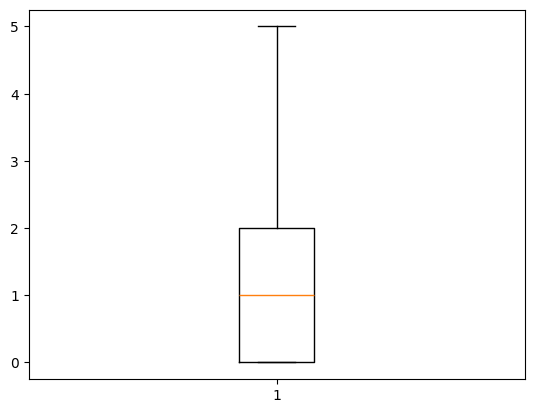

In [ ]:
plt.boxplot(df[~df['children'].isnull()]['children'])
plt.show()

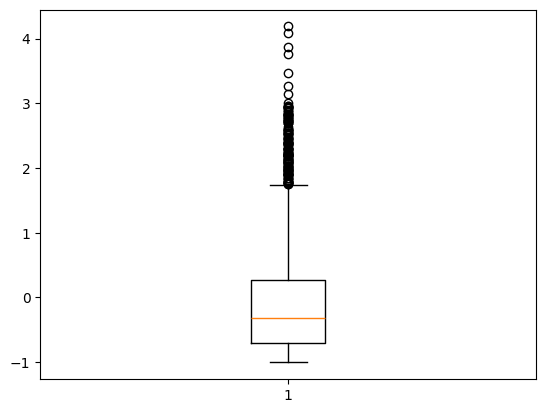

In [ ]:
plt.boxplot(df[~df['expenses'].isnull()]['expenses'])
plt.show()

In [ ]:
df.loc[df["expenses"].isin(df['expenses'].nlargest(2)), 'expenses'] = df[~df["expenses"].isin(df['expenses'].nlargest(2))]['expenses'].mean()

In [ ]:
df.dropna(how = "all", inplace = True)

In [ ]:
df.drop_duplicates(keep = "first", inplace = True)

`missing value imputation`

In [ ]:
# because bmi is normally distributed so missing values of bmi is replaced by its mean
df.fillna({'bmi' : df["bmi"].mean()}, inplace = True)

In [ ]:
df.fillna({'age' : df["age"].mean()}, inplace = True)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
df.isnull().sum()

,0
age,0
sex,3
bmi,0
children,3
smoker,3
region,2
expenses,2


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output = False)

In [ ]:
loc = df.columns.get_loc('sex')
temp_df = pd.DataFrame(ohe.fit_transform(df[['sex']]), columns = ohe.categories_, index = df.index)
df.drop(columns = ['sex'], inplace = True)
df.insert(loc, 'female', temp_df['female'])
df.insert(loc+1, 'male', temp_df['male'])

In [ ]:
loc = df.columns.get_loc('smoker')
temp_df = pd.DataFrame(ohe.fit_transform(df[['smoker']]), columns = ohe.categories_, index = df.index)
df.drop(columns = ['smoker'], inplace = True)
df.insert(loc, 'no_smoker', temp_df['no'])
df.insert(loc+1, 'is_smoker', temp_df['yes'])

In [ ]:
loc = df.columns.get_loc('region')
temp_df = pd.DataFrame(ohe.fit_transform(df[['region']]), columns = ohe.categories_, index = df.index)
df.drop(columns = ['region'], inplace = True)
df.insert(loc, 'southeast', temp_df['southeast'])
df.insert(loc+1, 'southwest', temp_df['southwest'])
df.insert(loc+2, 'northwest', temp_df['northwest'])
df.insert(loc+3, 'northeast', temp_df['northeast'])

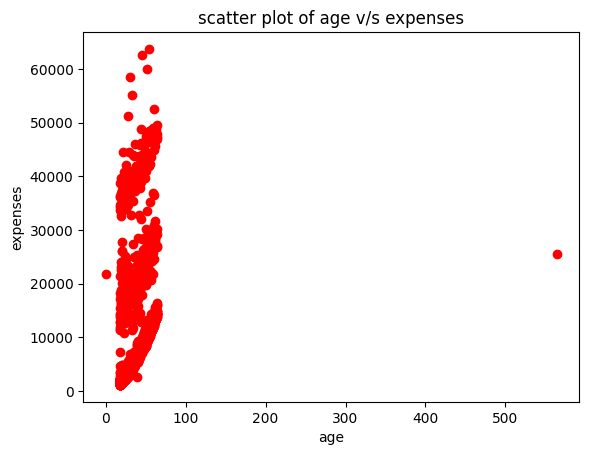

In [ ]:
plt.scatter(df['age'], df['expenses'], color = 'red')
plt.title("scatter plot of age v/s expenses")
plt.xlabel('age')
plt.ylabel('expenses')
plt.show()

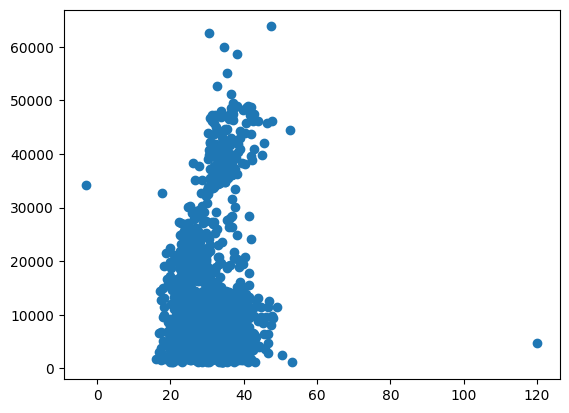

In [ ]:
plt.scatter(df['bmi'], df['expenses'])
plt.show()

## Linear And Polynomial Models

In [ ]:
df.columns

Index(['age', 'female', 'male', 'bmi', 'children', 'no_smoker', 'is_smoker',
       'southeast', 'southwest', 'northwest', 'northeast', 'expenses'],
      dtype='object')

## Standard Scaling On Numerical Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = df.columns
df[['age', 'bmi', 'expenses']] = scaler.fit_transform(df[['age', 'bmi', 'expenses']])

In [ ]:
df.to_csv('cleanedfinal.csv')

In [ ]:
df

,age,female,male,bmi,children,no_smoker,is_smoker,southeast,southwest,northwest,northeast,expenses
0,3.537355e-16,1.0,0.0,-0.425389,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.302007
1,-1.074315e+00,0.0,1.0,0.464718,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.954380
2,-5.764760e-01,0.0,1.0,0.344026,3.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.728626
3,-3.275568e-01,0.0,1.0,-1.209890,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.724650
4,-3.773407e-01,0.0,1.0,-0.274523,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.776912
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,5.187686e-01,0.0,1.0,0.042294,3.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.218833
1334,-1.074315e+00,1.0,0.0,0.178074,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.914563
1335,-1.074315e+00,1.0,0.0,0.932402,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.962313
1336,-9.249630e-01,1.0,0.0,-0.742207,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.930975


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:-1], df.iloc[:, -1], test_size = 0.2, random_state = 3)

simple linear regression

In [ ]:
x = df['is_smoker']
y = df['expenses']

x_mean = x.mean()
y_mean = y.mean()

beta_1 = ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean) ** 2).sum()
beta_0 = y_mean - beta_1 * x_mean

beta_0, beta_1

(np.float64(-0.39636774586657786), np.float64(1.939733730687723))

In [ ]:
y_pred = beta_0 + beta_1 * x


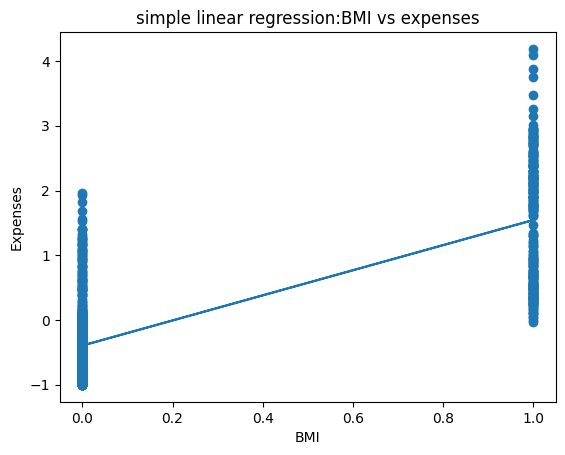

In [ ]:
y_pred=beta_0+beta_1*x
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.xlabel("BMI")
plt.ylabel("Expenses")
plt.title("simple linear regression:BMI vs expenses")
plt.show()

In [ ]:
errors=y-y_pred
squared_errors=errors**2
mse=np.mean(squared_errors)
print("mean Squared error(MSE):",mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

mean Squared error(MSE): 0.9131770852368359
RMSE: 0.955602995619434


In [ ]:
y_mean = np.mean(y)
SS_tot = np.sum((y - y_mean)**2)
SS_res = np.sum((y - y_pred)**2)
R2 = 1 - (SS_res / SS_tot)
print("Manual R^2:", R2)

Manual R^2: 0.08682291476316406
